<a href="https://colab.research.google.com/github/gingerthorp/deepLeaning/blob/master/study/4_Binary%20Classifying%20Neuron/DL4_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [5]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

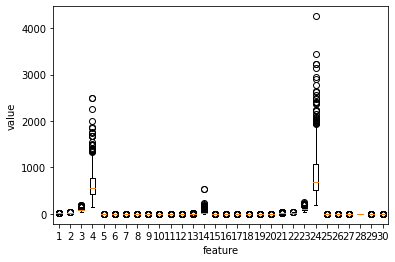

In [6]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [7]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [8]:
np.unique(cancer.target, return_counts=True)  # 타깃 데이터 확인하기.

(array([0, 1]), array([212, 357]))

In [9]:
x = cancer.data
y = cancer.target

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.2)
# 훈련 데이터 세트 나누기
# stratify = y : 훈련 데이터 나눌 때 클래스 비율을 동일하게 만듬, 클래스 비율이 불균형한 경우 지정함.
# test_size=0.2 : 기본 훈련으 75:25로 나누지만, 0.2로 설정하여 80:20으로 훈련 데이터를 나눕니다.
# random_state=42 : 데이터 세트를 무작위로 섞고 나누는데, 난수 초깃값을 지정하면 일정한 결과를 받을 수 있습니다.

In [12]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


In [13]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([170, 285]))
(array([0, 1]), array([42, 72]))


In [14]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 직선 방정식을 계산합니다.
    return z

  def backprop(self, x, err):
    w_grad = x * err                  # 가중치에 대한 그레이디언트를 계산합니다.
    b_grad = 1 * err                  # 절편에 대한 그레이디언트를 계산합니다.
    return w_grad, b_grad
  
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
    self.b = 0                        # 절편을 초기화합니다.
    for i in range(epochs):           # epochs만큼 반복합니다.
      for x_i, y_i in zip(x, y):      # 모든 샘플에 대해 반복합니다.
        z = self.forpass(x_i)         # 정방향 계산
        a = self.activation(z)        # 활성화 함수 적용
        err = -(y_i - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
        self.w -= w_grad              # 가중치 업데이트
        self.b -= b_grad              # 절편 업데이트

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    z = self.activation(np.array(z))
    return z > 0.5

In [15]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


In [17]:
np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


0.9035087719298246

In [20]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b   # 직선 방정식을 계산합니다.
    return z

  def backprop(self, x, err):
    w_grad = x * err                  # 가중치에 대한 그레이디언트를 계산합니다.
    b_grad = 1 * err                  # 절편에 대한 그레이디언트를 계산합니다.
    return w_grad, b_grad
  
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
    self.b = 0                        # 절편을 초기화합니다.
    for i in range(epochs):           # epochs만큼 반복합니다.
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:      # 모든 샘플에 대해 반복합니다.
        z = self.forpass(x[i])         # 정방향 계산
        a = self.activation(z)        # 활성화 함수 적용
        err = -(y[i] - a)              # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)  # 역방향 계산
        self.w -= w_grad              # 가중치 업데이트
        self.b -= b_grad              # 절편 업데이트
        # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다.
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))  # 에포크마다 평균 손실을 저장합니다.
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [39]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


0.9298245614035088

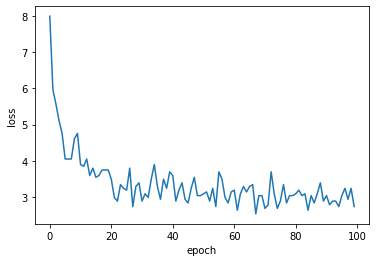

In [43]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [44]:
from sklearn.linear_model import SGDClassifier

In [45]:
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

In [46]:
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [47]:
sgd.score(x_test, y_test)

0.956140350877193

In [72]:
preduction_y = sgd.predict(x_test[:200])

In [73]:
result_y = y_test[:200]

In [74]:
np.mean(preduction_y == result_y)

0.956140350877193